# Interactive Visualization of Weather Time Series Data With Bokeh
In this lesson, we will do some simple plotting just using matplotlib to get an idea of what plotting is typically like in Python. Then we will add some pan/zoom interactivity to the plots using Bokeh. 

But first, about this data. This data was collected from the High-Performance Wireless Research and Education Network (HPWREN, https://hpwren.ucsd.edu ). HPWREN has worked in coordination with the San Diego Gas & Electric and regional fire first response services to establish the finest real-time weather data collection and video minitoring system on the planet.

In [29]:
# import packages
import pandas as pd
import datetime, dateutil
import ipywidgets as widgets
from matplotlib import pyplot as plt
from bokeh.io import export_png, output_notebook
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot
from pprint import pprint
output_notebook()

Loading BokehJS ...

### Read CSV Data Files With Pandas

In [30]:
df = pd.read_csv('data/csv/weather/toropeak.csv', header=0, index_col=1, parse_dates=True)

In [31]:
df.head()

id  temperature  humidity  wind_speed  wind_dir
timestamp                                                           
2019-09-15 14:00:00   0         16.7      29.6         5.1       200
2019-09-15 14:10:00   1         16.6      35.6         5.4       198
2019-09-15 14:20:00   2         16.7      33.4         4.7       175
2019-09-15 14:30:00   3         16.6      34.1         6.1       195
2019-09-15 14:40:00   4         17.3      33.4         2.5       212

We can see a column named 'id' which we won't need for this lesson so let's drop it.

In [32]:
df = df.drop(columns=['id'])

In [33]:
df.head()

temperature  humidity  wind_speed  wind_dir
timestamp                                                       
2019-09-15 14:00:00         16.7      29.6         5.1       200
2019-09-15 14:10:00         16.6      35.6         5.4       198
2019-09-15 14:20:00         16.7      33.4         4.7       175
2019-09-15 14:30:00         16.6      34.1         6.1       195
2019-09-15 14:40:00         17.3      33.4         2.5       212

Now let's plot all of the humidity data.

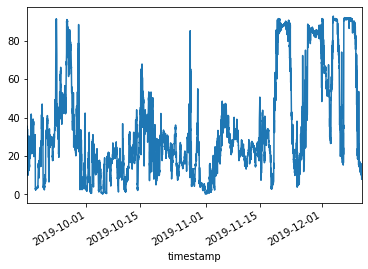

In [34]:
df.humidity.plot()

That's great, but let's make it bigger. 

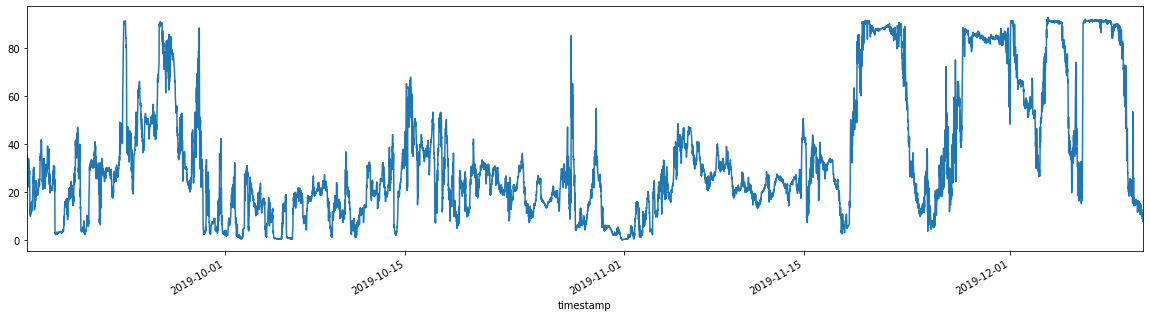

In [35]:
df.humidity.plot(figsize=(20,5))

Next, let's create a plot which combines all four columns of weather data. We will also label the y axes, give each plot a title, and color them differently. 

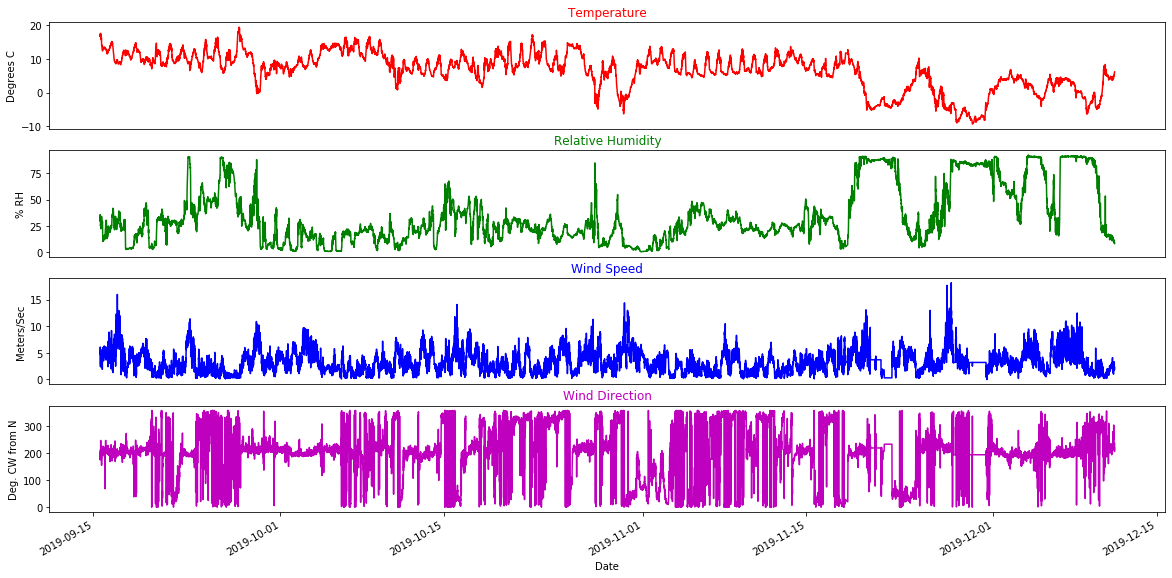

In [36]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20,10))
ax1.plot(df.temperature, color='r')
ax1.set_title('Temperature', color='r')
ax1.set_ylabel('Degrees C')
ax1.get_xaxis().set_visible(False)
ax2.plot(df.humidity, color='g')
ax2.set_title('Relative Humidity', color='g')
ax2.set_ylabel('% RH')
ax2.get_xaxis().set_visible(False)
ax3.plot(df.wind_speed, color='b')
ax3.set_title('Wind Speed', color='b')
ax3.set_ylabel('Meters/Sec')
ax3.get_xaxis().set_visible(False)
ax4.plot(df.wind_dir, color='m')
ax4.set_xlabel('Date')
ax4.set_ylabel('Deg. CW from N')
ax4.set_title('Wind Direction', color='m')
f.autofmt_xdate()

Let's try a different layout, 2 rows and 2 columns istead of 4 rows and 1 column. 

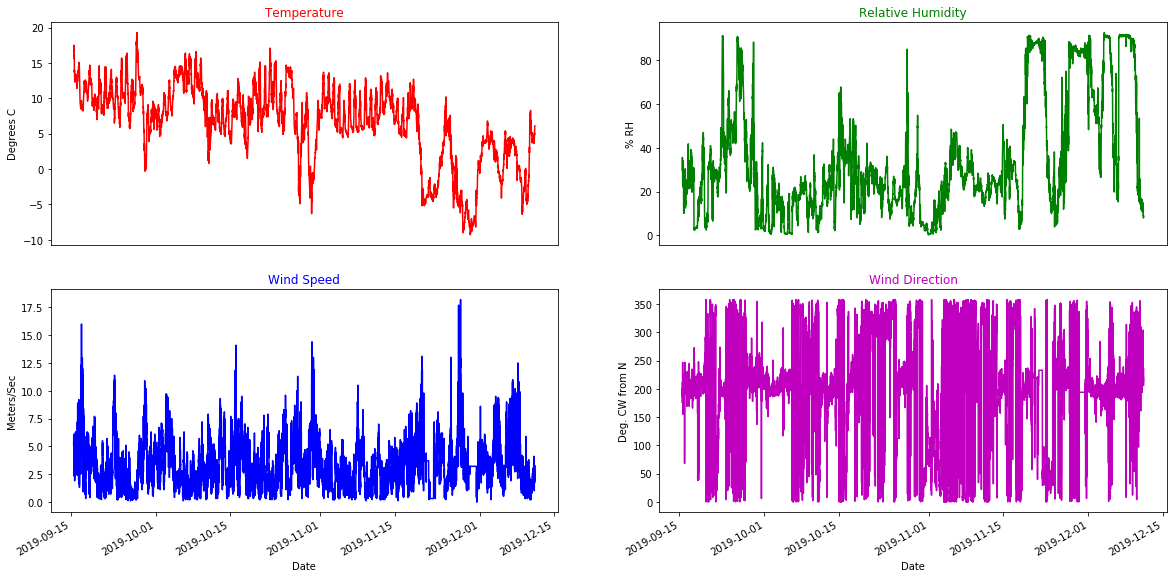

In [37]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10))
ax1.plot(df.temperature, color='r')
ax1.set_title('Temperature', color='r')
ax1.set_ylabel('Degrees C')
ax1.get_xaxis().set_visible(False)
ax2.plot(df.humidity, color='g')
ax2.set_title('Relative Humidity', color='g')
ax2.set_ylabel('% RH')
ax2.get_xaxis().set_visible(False)
ax3.plot(df.wind_speed, color='b')
ax3.set_title('Wind Speed', color='b')
ax3.set_xlabel('Date')
ax3.set_ylabel('Meters/Sec')
ax4.plot(df.wind_dir, color='m')
ax4.set_xlabel('Date')
ax4.set_ylabel('Deg. CW from N')
ax4.set_title('Wind Direction', color='m')
f.autofmt_xdate()

Next, let's read in the same data file but without specifying the 'timestamp' column as the index so we can extract subsets of data and plot them in a different way.

In [38]:
df = pd.read_csv('data/csv/weather/toropeak.csv', header=0, index_col=0, parse_dates=True)

In [39]:
df.head()

timestamp  temperature  humidity  wind_speed  wind_dir
id                                                               
0   2019-09-15 14:00         16.7      29.6         5.1       200
1   2019-09-15 14:10         16.6      35.6         5.4       198
2   2019-09-15 14:20         16.7      33.4         4.7       175
3   2019-09-15 14:30         16.6      34.1         6.1       195
4   2019-09-15 14:40         17.3      33.4         2.5       212

Next, let's extract a subset of data such as the timestamp and humidity columns and plot that. 

In [40]:
humidity_with_timestamp_df = df[['timestamp','humidity']]

In [41]:
humidity_with_timestamp_df.head()

timestamp  humidity
id                            
0   2019-09-15 14:00      29.6
1   2019-09-15 14:10      35.6
2   2019-09-15 14:20      33.4
3   2019-09-15 14:30      34.1
4   2019-09-15 14:40      33.4

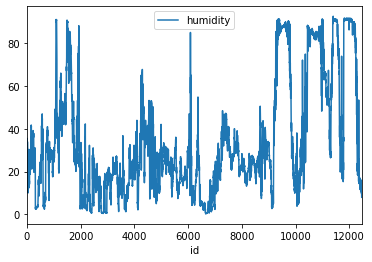

In [42]:
humidity_with_timestamp_df.plot()

OK, that's nice, but let's rename the 'timestamp' column to 'Date' once again, make it bigger, label the y axis, and save the resulting plot as a PNG image file. 

In [43]:
humidity_with_timestamp_df = humidity_with_timestamp_df.rename(columns={'timestamp':'Date'})

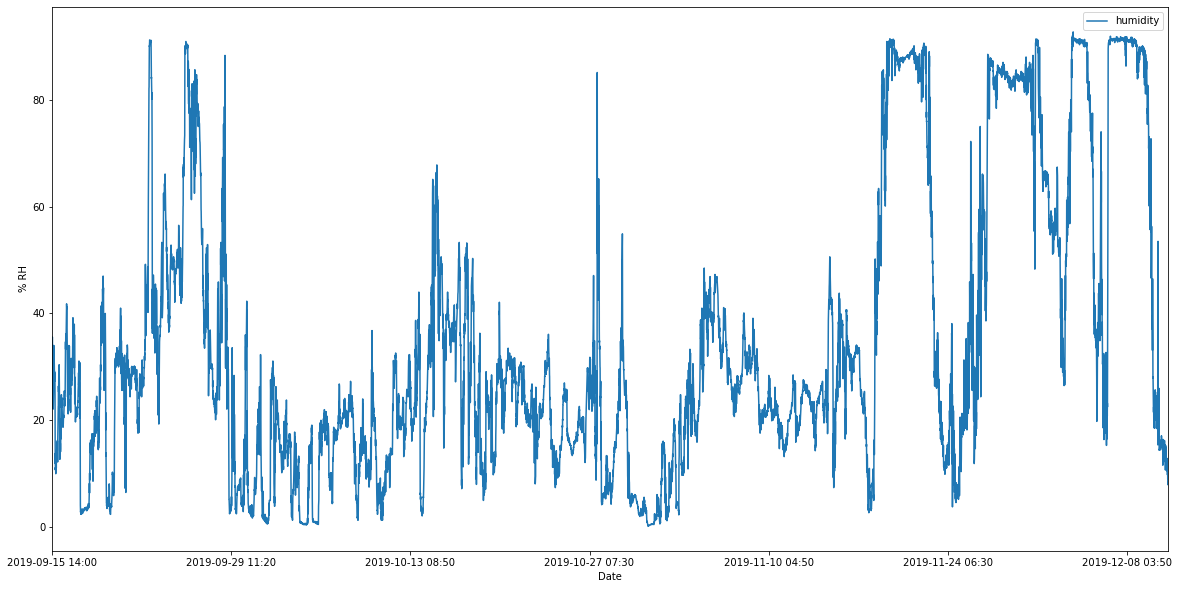

In [44]:
humidity_with_timestamp_df.set_index('Date').plot(figsize=(20,10)).set_ylabel('% RH')
plt.savefig("images/humidity.png")

## Create Interactive Visualizations With Bokeh

Next, we will create some interactive plots using Bokeh, but first we need to convert our dataframes to lists. First, we will create a new variable, xtime, for the x-axis. 

In [45]:
xtime = pd.to_datetime(df.timestamp)

Now let's generate a line plot and explore Bokeh's interactivity. 

In [46]:
p = figure(title="Humidity", plot_width=800, plot_height=300)
p.line(xtime, df.humidity, color="#F46D43")
show(p)

There appears to be something odd about the x-axis tic mark labels. they appear to be very large floating point numbers. To fix this, we can use the 'x_axis_type' attribute to be 'datetime'.

In [47]:
p = figure(title="Humidity", plot_width=800, plot_height=300, x_axis_type='datetime')
p.line(xtime, df.humidity, color="#F46D43")
show(p)

Next, let's create a combined plot similar to what we did previously with just matplotlib.

In [48]:
figures = []
p = figure(title="Temperature", x_axis_type='datetime')
p.line(xtime, df.temperature, color="#990000")
figures.append(p)
p = figure(title="Humidity", x_axis_type='datetime')
p.line(xtime, df.humidity, color="#009900")
figures.append(p)
p = figure(title="Wind Speed", x_axis_type='datetime')
p.line(xtime, df.wind_speed, color="#000099")
figures.append(p)
p = figure(title="Wind Direction", x_axis_type='datetime')
p.line(xtime, df.wind_dir, color="#990099")
figures.append(p)

show(gridplot(figures, ncols=1, plot_width=800, plot_height=200))

OK, now we've got something that is very interactive, but wouldn't it be great if we could link the panning and zooming across all 4 plots? We can do that by using the x_range attribute and set all for to the same variable. This way we can lock all four plots together for panning and zooming. Very nice!

In [49]:
figures = []
s1 = figure(title="Temperature", x_axis_type='datetime')
s1.line(xtime, df.temperature, color="#990000")
s2 = figure(title="Humidity", x_range=s1.x_range, x_axis_type='datetime')
s2.line(xtime, df.humidity, color="#009900")
s3 = figure(title="Wind Speed", x_range=s1.x_range, x_axis_type='datetime')
s3.line(xtime, df.wind_speed, color="#000099")
s4 = figure(title="Wind Direction", x_range=s1.x_range, x_axis_type='datetime')
s4.line(xtime, df.wind_dir, color="#990099")

show(gridplot([[s1], [s2], [s3], [s4]], plot_width=800, plot_height=200))

Dropdown(description='Number:', index=16, options=('bigblackmountain', 'boucherhill', 'lyonspeak', 'mesagrande…

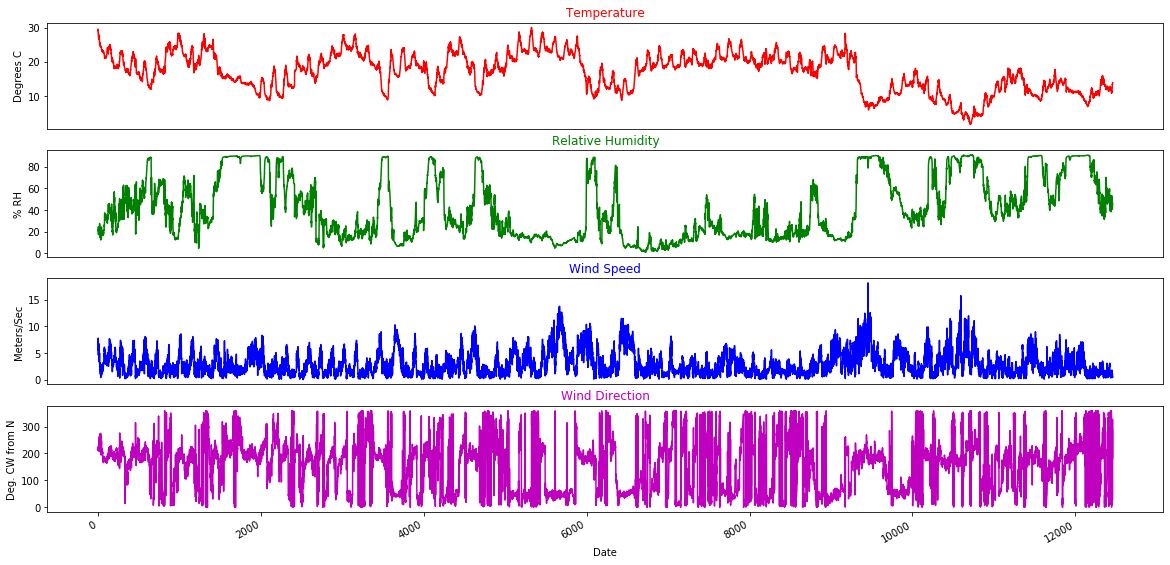

In [50]:
w = widgets.Dropdown(
    options=['bigblackmountain','boucherhill','lyonspeak','mesagrande','mtlaguna','mtwoodson','pala','redmountain','sanclementeisland','santaynezpeak','santaysabel','santiagopeak','sdsc','signal','skyoaks','smerns','toropeak','upperbell','uppertalega','warnersprings'],
    value='toropeak',
    description='Number:',
    disabled=False,
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        new_file = 'data/csv/weather/' + str(change['new']) + '.csv'
        df = pd.read_csv(new_file, header=0, index_col=0, parse_dates=True)
        f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20,10))
        ax1.plot(df.temperature, color='r')
        ax1.set_title('Temperature', color='r')
        ax1.set_ylabel('Degrees C')
        ax1.get_xaxis().set_visible(False)
        ax2.plot(df.humidity, color='g')
        ax2.set_title('Relative Humidity', color='g')
        ax2.set_ylabel('% RH')
        ax2.get_xaxis().set_visible(False)
        ax3.plot(df.wind_speed, color='b')
        ax3.set_title('Wind Speed', color='b')
        ax3.set_ylabel('Meters/Sec')
        ax3.get_xaxis().set_visible(False)
        ax4.plot(df.wind_dir, color='m')
        ax4.set_xlabel('Date')
        ax4.set_ylabel('Deg. CW from N')
        ax4.set_title('Wind Direction', color='m')
        f.autofmt_xdate()

w.observe(on_change)

display(w)

In [51]:
w = widgets.Dropdown(
    options=['bigblackmountain','boucherhill','lyonspeak','mesagrande','mtlaguna','mtwoodson','pala','redmountain','sanclementeisland','santaynezpeak','santaysabel','santiagopeak','sdsc','signal','skyoaks','smerns','toropeak','upperbell','uppertalega','warnersprings'],
    value='toropeak',
    description='Number:',
    disabled=False,
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        new_file = 'data/csv/weather/' + str(change['new']) + '.csv'
        df = pd.read_csv(new_file, header=0, index_col=0, parse_dates=True)
        xtime = pd.to_datetime(df.timestamp)
        figures = []
        s1 = figure(title="Temperature", x_axis_type='datetime')
        s1.line(xtime, df.temperature, color="#990000")
        s2 = figure(title="Humidity", x_range=s1.x_range, x_axis_type='datetime')
        s2.line(xtime, df.humidity, color="#009900")
        s3 = figure(title="Wind Speed", x_range=s1.x_range, x_axis_type='datetime')
        s3.line(xtime, df.wind_speed, color="#000099")
        s4 = figure(title="Wind Direction", x_range=s1.x_range, x_axis_type='datetime')
        s4.line(xtime, df.wind_dir, color="#990099")

        show(gridplot([[s1], [s2], [s3], [s4]], plot_width=800, plot_height=200))

w.observe(on_change)

display(w)

Dropdown(description='Number:', index=16, options=('bigblackmountain', 'boucherhill', 'lyonspeak', 'mesagrande…